**Gemotric Operations and Other Mathematical Tools**

<ul>
    <li><a href='#PT'> Geometric Operations  </a>
        <ul>
            <li>Scaling</li>
            <li>Translation</li>
            <li>Rotation</li>   
          </ul>
        <li><a href='#PT'>  Mathematical Operations   </a>
        <ul>
            <li>Array Operations  </li>
            <li>Matix Operations n</li> 
          </ul>


</ul>


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(5,5))
    plt.subplot(121)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(122)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()

**Geometric Transformation**

 Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.


We can resize an image using the method  <code>resize()</code> of <code>PIL</code> images, which takes the resized image's <code>width</code> and <code>height</code> as paramters. 

Consider the following image:


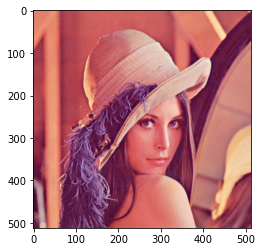

In [3]:
image = Image.open("lenna.png")
plt.imshow(image)
plt.show()

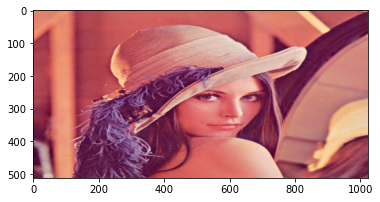

In [4]:
width, height = image.size
new_width = 2*width
new_height = height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

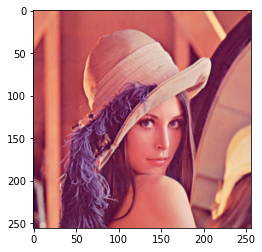

In [5]:
new_width = width//2
new_height = height//2
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

**Rotation**

We can rotate an image by angle $\theta$, using the method 'rotate'.

<function matplotlib.pyplot.show(close=None, block=None)>

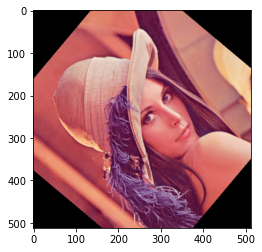

In [6]:
theta = 50
new_image = image.rotate(theta)
plt.imshow(new_image)
plt.show

**Mathematical Operations**

**Array Operations**
We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

Before doing that, we must first convert PIL image to a numpy array.

In [7]:
image = np.array(image)

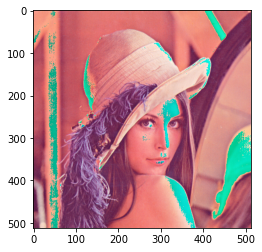

In [8]:
new_image = image+20
plt.imshow(new_image)
plt.show()

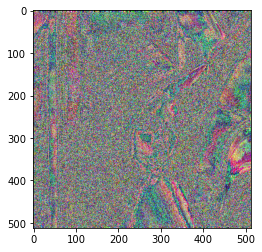

In [9]:
new_image = image*20
plt.imshow(new_image)
plt.show()

We can add the elements of two arrays of equal shape. In this example, we generate an array of random noises with the same shape and data type as our image.


In [10]:
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

We add the generated noise to the image and plot the result. We see the corrupted image:

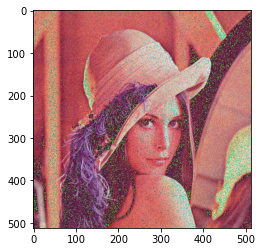

In [11]:
new_image = image + Noise
plt.imshow(new_image)
plt.show()

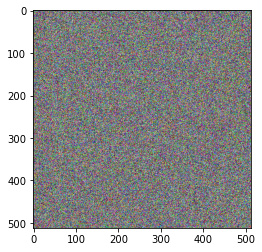

In [12]:
new_image = image * Noise
plt.imshow(new_image)
plt.show()

**Matrix Operations**

In [13]:
baboon = Image.open("baboon.png")

In [14]:
from PIL import ImageOps

In [15]:
gray = ImageOps.grayscale(baboon)

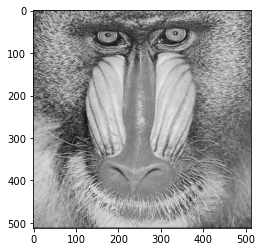

In [16]:
gray = np.array(gray)
plt.imshow(gray, cmap='gray')
plt.show()

We can apply algorithms designed for matrices. We ca use Singular Value Descomposition, decomposing our image matrix into a product of three matrices.

What is Singular Value Decomposition (SVD)?
SVD is a matrix factorization technique where a matrix 
𝐴
A (e.g., an image matrix) is decomposed into three matrices:

𝐴
=
𝑈
⋅
𝑆
⋅
𝑉
𝑇
A=U⋅S⋅V 
T
 
Where:

𝑈
U: A matrix containing the left singular vectors of 
𝐴
A. It is an orthogonal matrix.
𝑆
S: A diagonal matrix containing the singular values of 
𝐴
A. These values represent the "energy" or importance of the corresponding singular vectors.
𝑉
𝑇
V 
T
 : A matrix containing the right singular vectors of 
𝐴
A. It is also orthogonal.

In [17]:
U, s, V = np.linalg.svd(gray, full_matrices=True)

In [18]:
s.shape

(512,)

We can convert s to a diagonal matrix S:

In [19]:
S = np.zeros((gray.shape[0], gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

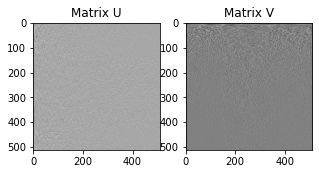

In [20]:
plot_image(U,V, title_1="Matrix U", title_2="Matrix V")


Most of the elements in s are zero:

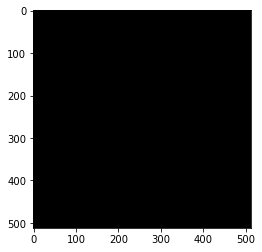

In [21]:
plt.imshow(S, cmap="gray")
plt.show()

We can find the matrix product of all the matrices. First, we can perform matrix multiplication on S and U and assign it to B and plot the result.

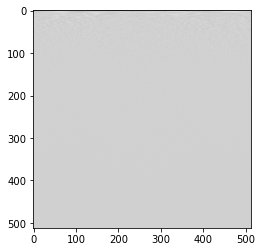

In [22]:
B = S.dot(V)
plt.imshow(B, cmap='gray')
plt.show()

We can find the matrix product of `U`, `S`, and `B`. We see it's the entire image:


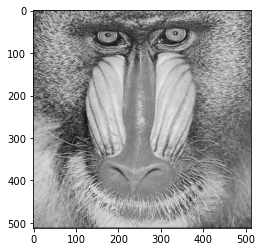

In [23]:
A = U.dot(B)
plt.imshow(A, cmap='gray')
plt.show()

It turns out that many elements are redundant. We can eliminate some rows and columns of S and V and appoximate the image by finding the product:

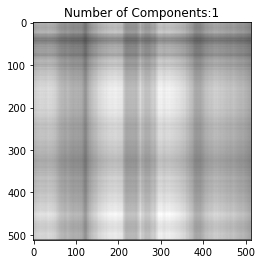

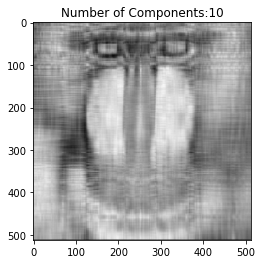

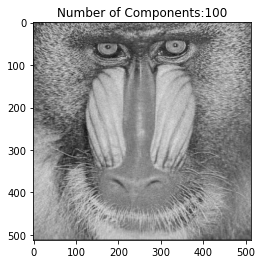

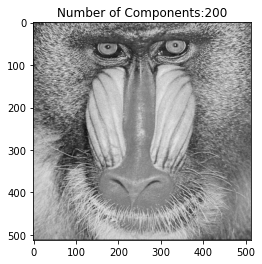

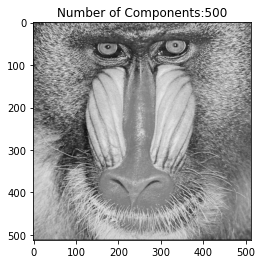

In [26]:
for n_component in [1,10,100,200,500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A, cmap='gray')
    plt.title("Number of Components:" + str(n_component))
    plt.show()